In [1]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your Feather file
feather_file_path = '/allah/freqtrade/user_data/data/binance/futures/ETH_USDT_USDT-1m-futures.feather'

# Read the data from the Feather file into a DataFrame
df_binance_1m = feather.read_dataframe(feather_file_path)
df_binance_1m['date'] = df_binance_1m['date'].dt.strftime('%Y-%m-%d %H:%M:%S')


# Now, 'df' contains your data as a DataFrame, and you can perform analysis on it.

In [2]:
import pandas as pd
# Assuming df_combined is your DataFrame
df_analyzed = df_binance_1m.copy()
df_analyzed['date'] = pd.to_datetime(df_analyzed['date']) + pd.DateOffset(hours=8)

filtered_df = df_analyzed[
    df_analyzed['volume'] > (df_analyzed['volume'].rolling(window=6, min_periods=1).sum() - df_analyzed['volume'])
]
# Display the resulting DataFrame (last 100 rows)
filtered_df[-10:]


,date,open,high,low,close,volume
2015437,2023-09-27 06:22:00,1589.05,1590.62,1589.04,1589.98,1504.457
2015486,2023-09-27 07:11:00,1588.90,1591.37,1588.90,1591.16,4340.682
2015514,2023-09-27 07:39:00,1592.03,1593.20,1591.73,1592.52,4125.831
2015599,2023-09-27 09:04:00,1593.28,1593.47,1590.80,1591.14,8562.636
2015628,2023-09-27 09:33:00,1591.82,1592.39,1591.82,1592.39,1635.809
2015693,2023-09-27 10:38:00,1590.22,1590.36,1589.76,1589.90,1118.089
2015694,2023-09-27 10:39:00,1589.90,1590.86,1589.89,1590.79,1911.723
2015756,2023-09-27 11:41:00,1591.35,1592.28,1591.35,1592.18,1367.900
2015770,2023-09-27 11:55:00,1594.68,1597.71,1594.62,1596.99,10630.360
2015799,2023-09-27 12:24:00,1594.59,1594.64,1593.54,1593.79,3063.355


35.23809523809524


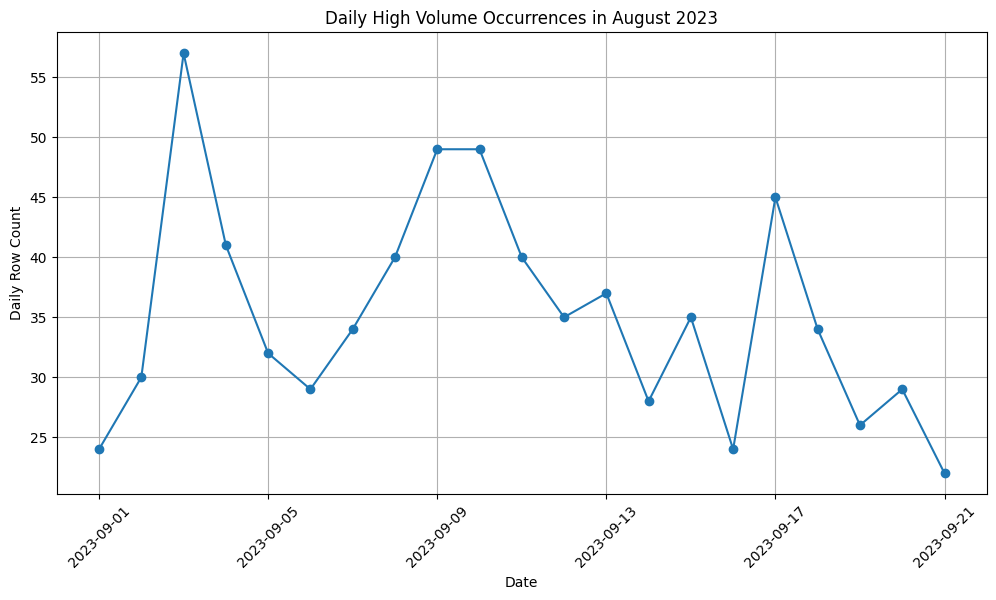

In [12]:
# Filter rows for August 2023
filtered_df_august_2023 = filtered_df[
    (filtered_df['date'].dt.year == 2023) & (filtered_df['date'].dt.month == 9)
]

# Group by date (day) and count the occurrences
daily_occurrences = filtered_df_august_2023.groupby(filtered_df_august_2023['date'].dt.date)['date'].count()
print(daily_occurrences.mean())
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(daily_occurrences.index, daily_occurrences.values, marker='o', linestyle='-')
plt.title('Daily High Volume Occurrences in August 2023')
plt.xlabel('Date')
plt.ylabel('Daily Row Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()